# Objective :- 

* A cancer tumor is malignant, meaning it can grow and spread to other parts of the body. A benign tumor means the tumor can grow but will not spread.

* To Predict where the patient have Cancer or not 

# Step 1 :Library & Data Import

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv(r'Prostate_Cancer.csv')
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


#  Step 2 : Data Pre-Processing

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


### Removing irrelevant  

In [26]:
data.drop('id',axis=1,inplace=True)

<AxesSubplot:>

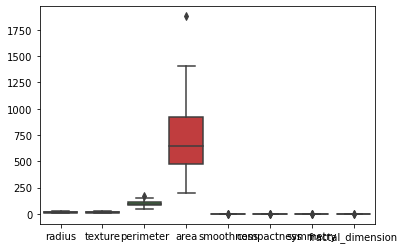

In [27]:
import seaborn as sns
sns.boxplot(data=data)


### Bad Rate Analysis 

In [28]:
data.diagnosis_result.value_counts()

M    62
B    38
Name: diagnosis_result, dtype: int64

# Step 3 : Data Partition

In [29]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
train_x = data.drop(['diagnosis_result'],axis=1)
train_y = data['diagnosis_result']

# Train test split

X_train, X_test, y_train, y_test =train_test_split(train_x, train_y, test_size=0.3,random_state=20)

# Step 4 : Model Building 

In [41]:
## Instantiate the model with 5 neighbors. 
model = KNeighborsClassifier(n_neighbors=7)  

# randomly taken k =  4 
# taken  k = sqrt(n)

## Fit the model on the training data.
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

# Step 5 : Predictions on Train Dataset

In [42]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result
39,10,14,88,559,0.102,0.126,0.172,0.064,M
64,16,19,83,499,0.112,0.126,0.191,0.066,M
72,21,12,114,929,0.107,0.183,0.193,0.065,M
60,15,18,65,312,0.113,0.081,0.274,0.070,B
46,22,12,52,202,0.086,0.059,0.177,0.065,B


In [43]:
train['Predicted']=model.predict(X_train)
train.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result,Predicted
39,10,14,88,559,0.102,0.126,0.172,0.064,M,M
64,16,19,83,499,0.112,0.126,0.191,0.066,M,B
72,21,12,114,929,0.107,0.183,0.193,0.065,M,M
60,15,18,65,312,0.113,0.081,0.274,0.070,B,B
46,22,12,52,202,0.086,0.059,0.177,0.065,B,B


# Step 6 : Model Performance Metrics

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['diagnosis_result'],train['Predicted'])
print(confusion_matrix)

[[19  2]
 [ 5 44]]


In [45]:
Accuracy_Train=((19+44)/(70)*100)
print(Accuracy_Train)

90.0


# Step 7 : Predictions on Test Dataset

In [46]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result
70,21,18,124,1130,0.090,0.103,0.158,0.055,M
74,18,13,79,471,0.092,0.068,0.172,0.059,B
2,21,27,130,1203,0.125,0.160,0.207,0.060,M
44,10,15,85,532,0.097,0.105,0.175,0.062,M
56,10,19,126,1152,0.105,0.127,0.192,0.060,M


In [47]:
test['Predicted']=model.predict(X_test)
test.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result,Predicted
70,21,18,124,1130,0.090,0.103,0.158,0.055,M,M
74,18,13,79,471,0.092,0.068,0.172,0.059,B,B
2,21,27,130,1203,0.125,0.160,0.207,0.060,M,M
44,10,15,85,532,0.097,0.105,0.175,0.062,M,M
56,10,19,126,1152,0.105,0.127,0.192,0.060,M,M


# Step 8 : Model Performance Metrics on Test data 

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['diagnosis_result'],test['Predicted'])
print(confusion_matrix)

[[ 9  8]
 [ 1 12]]


In [49]:
Accuracy_test=((12+9)/(30)*100)
Accuracy_test

70.0

# To identify the best value of K

In [40]:
from sklearn.metrics import accuracy_score
for K in range(25): #K=0,1,2,.....,24
    K_value = K+1 # K_value=1
    model2 = KNeighborsClassifier(n_neighbors = K_value) #1
    model2.fit(X_train, y_train) 
    y_pred_Train= model2.predict(X_train)
    y_pred_test = model2.predict(X_test)
    print("Train Accuracy is ", 
          round(accuracy_score(y_train,y_pred_Train)*100,0),"      "," Test Accuracy is ", round(accuracy_score(y_test,y_pred_test)*100,0),"% for K-Value:",
          K_value)

Train Accuracy is  100.0         Test Accuracy is  57.0 % for K-Value: 1
Train Accuracy is  94.0         Test Accuracy is  60.0 % for K-Value: 2
Train Accuracy is  93.0         Test Accuracy is  60.0 % for K-Value: 3
Train Accuracy is  86.0         Test Accuracy is  63.0 % for K-Value: 4
Train Accuracy is  89.0         Test Accuracy is  67.0 % for K-Value: 5
Train Accuracy is  89.0         Test Accuracy is  67.0 % for K-Value: 6
Train Accuracy is  90.0         Test Accuracy is  70.0 % for K-Value: 7
Train Accuracy is  90.0         Test Accuracy is  67.0 % for K-Value: 8
Train Accuracy is  87.0         Test Accuracy is  63.0 % for K-Value: 9
Train Accuracy is  86.0         Test Accuracy is  63.0 % for K-Value: 10
Train Accuracy is  87.0         Test Accuracy is  63.0 % for K-Value: 11
Train Accuracy is  86.0         Test Accuracy is  63.0 % for K-Value: 12
Train Accuracy is  87.0         Test Accuracy is  63.0 % for K-Value: 13
Train Accuracy is  86.0         Test Accuracy is  67.0 % fo

# Finish